In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
Traindata_with_Target = pd.read_csv('Traindata_with_Target.csv')
Train_claim = pd.read_csv('Train_claim.csv')
Train_Demographics = pd.read_csv('Train_Demographics.csv')
Train_Policy = pd.read_csv('Train_Policy.csv')
Train_Vehicle = pd.read_csv('Train_Vehicle.csv')

In [3]:
Traindata_with_Target

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y
...,...,...
28831,Cust9773,N
28832,Cust38439,N
28833,Cust38444,N
28834,Cust26466,N


In [4]:
ID = set(Traindata_with_Target['CustomerID'])
len(ID)

28836

In [5]:
Train_claim


,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,2015-01-24,Vehicle Theft,?,Trivial Damage,Police,State9,City4,Location 1890,3,1,NO,0,3,?,6590,870,1078,4642
28832,Cust9994,2015-02-09,Single Vehicle Collision,Front Collision,Minor Damage,Fire,State8,City3,Location 2097,17,1,YES,0,2,YES,74547,14699,7875,51973
28833,Cust9996,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City7,Location 1452,1,1,YES,2,0,YES,55305,7043,7043,41219
28834,Cust9997,2015-01-28,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,State9,City3,Location 1876,1,1,?,2,0,YES,55830,7059,7059,41712


In [6]:
Train_claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   DateOfIncident         28836 non-null  object
 2   TypeOfIncident         28836 non-null  object
 3   TypeOfCollission       28836 non-null  object
 4   SeverityOfIncident     28836 non-null  object
 5   AuthoritiesContacted   28836 non-null  object
 6   IncidentState          28836 non-null  object
 7   IncidentCity           28836 non-null  object
 8   IncidentAddress        28836 non-null  object
 9   IncidentTime           28836 non-null  int64 
 10  NumberOfVehicles       28836 non-null  int64 
 11  PropertyDamage         28836 non-null  object
 12  BodilyInjuries         28836 non-null  int64 
 13  Witnesses              28836 non-null  object
 14  PoliceReport           28836 non-null  object
 15  AmountOfTotalClaim 

In [7]:
set(Train_claim['CustomerID']) == ID

True

In [8]:
Train_Demographics

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India
...,...,...,...,...,...,...,...,...,...,...
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India


In [9]:
Train_Demographics.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   InsuredAge             28836 non-null  int64 
 2   InsuredZipCode         28836 non-null  int64 
 3   InsuredGender          28806 non-null  object
 4   InsuredEducationLevel  28836 non-null  object
 5   InsuredOccupation      28836 non-null  object
 6   InsuredHobbies         28836 non-null  object
 7   CapitalGains           28836 non-null  int64 
 8   CapitalLoss            28836 non-null  int64 
 9   Country                28834 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


In [10]:
set(Train_Demographics['CustomerID']) == ID

True

In [11]:
Train_Policy

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007
...,...,...,...,...,...,...,...,...,...,...
28831,148614,425,1999-10-12,State3,250/500,1000,839.81,0,wife,Cust39493
28832,148615,367,1996-11-09,State3,250/500,1000,811.03,0,husband,Cust39494
28833,148616,208,1995-12-04,State3,250/500,1000,891.37,0,husband,Cust39495
28834,148618,401,1994-09-12,State3,250/500,856,911.37,0,own-child,Cust39497


In [12]:
Train_Policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   DateOfPolicyCoverage        28836 non-null  object 
 3   InsurancePolicyState        28836 non-null  object 
 4   Policy_CombinedSingleLimit  28836 non-null  object 
 5   Policy_Deductible           28836 non-null  int64  
 6   PolicyAnnualPremium         28836 non-null  float64
 7   UmbrellaLimit               28836 non-null  int64  
 8   InsuredRelationship         28836 non-null  object 
 9   CustomerID                  28836 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.2+ MB


In [13]:
set(Train_Policy['CustomerID']) == ID

True

In [14]:
Train_Vehicle

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212
...,...,...,...
115339,Cust22134,VehicleMake,Audi
115340,Cust25338,VehicleID,Vehicle28831
115341,Cust7637,VehicleID,Vehicle12870
115342,Cust33581,VehicleID,Vehicle19680


In [15]:
Train_Vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115344 entries, 0 to 115343
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CustomerID               115344 non-null  object
 1   VehicleAttribute         115344 non-null  object
 2   VehicleAttributeDetails  115344 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [16]:
len(set(Train_Vehicle['CustomerID']))

28836

In [17]:
a = Train_Vehicle.groupby('CustomerID').agg({'VehicleAttributeDetails': 'count'}).reset_index()

In [18]:
a

,CustomerID,VehicleAttributeDetails
0,Cust10000,4
1,Cust10001,4
2,Cust10002,4
3,Cust10003,4
4,Cust10004,4
...,...,...
28831,Cust9993,4
28832,Cust9994,4
28833,Cust9996,4
28834,Cust9997,4


In [19]:
np.sum(a['VehicleAttributeDetails'] == 4)

28836

In [20]:
Train_Vehicle[Train_Vehicle.CustomerID == 'Cust10001']

,CustomerID,VehicleAttribute,VehicleAttributeDetails
589,Cust10001,VehicleYOM,2006
1112,Cust10001,VehicleID,Vehicle15893
40108,Cust10001,VehicleModel,A5
66356,Cust10001,VehicleMake,Audi


In [21]:
Train_Vehicle_1 = Train_Vehicle.pivot(index = 'CustomerID',  columns = 'VehicleAttribute', 
                                      values = ['VehicleAttributeDetails']).reset_index()

In [22]:
Train_Vehicle_1

CustomerID VehicleAttributeDetails                           \
VehicleAttribute                          VehicleID VehicleMake VehicleModel   
0                 Cust10000            Vehicle26917        Audi           A5   
1                 Cust10001            Vehicle15893        Audi           A5   
2                 Cust10002             Vehicle5152  Volkswagen        Jetta   
3                 Cust10003            Vehicle37363  Volkswagen        Jetta   
4                 Cust10004            Vehicle28633      Toyota          CRV   
...                     ...                     ...         ...          ...   
28831              Cust9993            Vehicle13568      Suburu      Impreza   
28832              Cust9994            Vehicle19810        Jeep     Wrangler   
28833              Cust9996             Vehicle3339      Suburu       Legacy   
28834              Cust9997            Vehicle10240      Suburu    Forrestor   
28835              Cust9999            Vehicle39163      Suburu         E400   

                             
VehicleAttribute VehicleYOM  
0                      2008  
1                      2006  
2                      1999  
3                      2003  
4                      2010  
...                     ...  
28831                  2007  
28832                  2003  
28833                  2004  
28834                  2004  
28835                  2007  

[28836 rows x 5 columns]

In [23]:
Train_Vehicle_1.columns

MultiIndex([(             'CustomerID',             ''),
            ('VehicleAttributeDetails',    'VehicleID'),
            ('VehicleAttributeDetails',  'VehicleMake'),
            ('VehicleAttributeDetails', 'VehicleModel'),
            ('VehicleAttributeDetails',   'VehicleYOM')],
           names=[None, 'VehicleAttribute'])

In [24]:
d = {x: x[0] for x in Train_Vehicle_1.columns}
d

{('CustomerID', ''): 'CustomerID',
 ('VehicleAttributeDetails', 'VehicleID'): 'VehicleAttributeDetails',
 ('VehicleAttributeDetails', 'VehicleMake'): 'VehicleAttributeDetails',
 ('VehicleAttributeDetails', 'VehicleModel'): 'VehicleAttributeDetails',
 ('VehicleAttributeDetails', 'VehicleYOM'): 'VehicleAttributeDetails'}

In [25]:
Train_Vehicle_1.columns = ['CustomerID', 'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM']

In [26]:
Train_Vehicle_1

,CustomerID,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust10000,Vehicle26917,Audi,A5,2008
1,Cust10001,Vehicle15893,Audi,A5,2006
2,Cust10002,Vehicle5152,Volkswagen,Jetta,1999
3,Cust10003,Vehicle37363,Volkswagen,Jetta,2003
4,Cust10004,Vehicle28633,Toyota,CRV,2010
...,...,...,...,...,...
28831,Cust9993,Vehicle13568,Suburu,Impreza,2007
28832,Cust9994,Vehicle19810,Jeep,Wrangler,2003
28833,Cust9996,Vehicle3339,Suburu,Legacy,2004
28834,Cust9997,Vehicle10240,Suburu,Forrestor,2004


In [27]:
Train_Vehicle_1.columns

Index(['CustomerID', 'VehicleID', 'VehicleMake', 'VehicleModel', 'VehicleYOM'], dtype='object')

In [28]:
tables = [Train_claim, Train_Demographics, Train_Policy, Train_Vehicle_1]

In [29]:
data = Traindata_with_Target 

In [30]:
for table in tables:
    data = data.merge(table, on = 'CustomerID')

In [31]:
data

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust20065,N,2015-01-09,Multi-vehicle Collision,Rear Collision,Total Loss,Other,State9,City4,Location 1404,...,State2,250/500,2000,1142.87,0,own-child,Vehicle30662,Mercedes,E400,2005
1,Cust37589,N,2015-02-20,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,State4,City3,Location 1675,...,State2,100/300,1000,1274.38,2857344,own-child,Vehicle17183,Toyota,Highlander,2010
2,Cust24312,N,2015-01-14,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State5,City2,Location 1546,...,State1,500/1000,745,1269.93,0,other-relative,Vehicle33982,Volkswagen,Passat,2002
3,Cust5493,Y,2015-01-07,Multi-vehicle Collision,Side Collision,Major Damage,Ambulance,State7,City4,Location 1413,...,State2,100/300,986,1218.60,0,other-relative,Vehicle12299,Toyota,Highlander,2011
4,Cust7704,Y,2015-02-26,Multi-vehicle Collision,Side Collision,Major Damage,Other,State4,City6,Location 1367,...,State3,250/500,576,1431.02,4235779,unmarried,Vehicle30447,Ford,Wrangler,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9773,N,2015-02-13,Single Vehicle Collision,Side Collision,Minor Damage,Fire,State7,City3,Location 1324,...,State2,250/500,1000,1108.55,739864,unmarried,Vehicle24503,Nissan,RSX,2002
28832,Cust38439,N,2015-01-19,Multi-vehicle Collision,Side Collision,Total Loss,Police,State5,City3,Location 1880,...,State2,100/300,1008,1551.84,41592,own-child,Vehicle9733,Accura,RSX,2014
28833,Cust38444,N,2015-01-21,Multi-vehicle Collision,Side Collision,Total Loss,Police,State5,City7,Location 1632,...,State1,100/300,660,1119.32,0,not-in-family,Vehicle1823,Saab,RSX,2013
28834,Cust26466,N,2015-01-02,Parked Car,?,Trivial Damage,None,State4,City7,Location 1364,...,State3,250/1000,1674,1229.88,4674160,wife,Vehicle9113,Accura,RSX,2004


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28836 non-null  object 
 1   ReportedFraud               28836 non-null  object 
 2   DateOfIncident              28836 non-null  object 
 3   TypeOfIncident              28836 non-null  object 
 4   TypeOfCollission            28836 non-null  object 
 5   SeverityOfIncident          28836 non-null  object 
 6   AuthoritiesContacted        28836 non-null  object 
 7   IncidentState               28836 non-null  object 
 8   IncidentCity                28836 non-null  object 
 9   IncidentAddress             28836 non-null  object 
 10  IncidentTime                28836 non-null  int64  
 11  NumberOfVehicles            28836 non-null  int64  
 12  PropertyDamage              28836 non-null  object 
 13  BodilyInjuries              288

In [33]:
data['Country'].value_counts()

India    28834
Name: Country, dtype: int64

In [34]:
data.drop(columns = 'Country', inplace = True)

In [35]:
data= data[~data['InsuredGender'].isnull()]

In [36]:
data['AmountOfTotalClaim'].value_counts()

MISSEDDATA    50
6820          12
5400           8
60600          8
55000          7
              ..
63706          1
95462          1
86160          1
67335          1
90334          1
Name: AmountOfTotalClaim, Length: 21959, dtype: int64

In [37]:
data= data[data['AmountOfTotalClaim']!='MISSEDDATA']

In [38]:
data['AmountOfTotalClaim'].value_counts()

6820     12
5400      8
60600     8
55000     7
5399      7
         ..
63706     1
95462     1
86160     1
67335     1
90334     1
Name: AmountOfTotalClaim, Length: 21958, dtype: int64

In [39]:
data['AmountOfTotalClaim'] = data['AmountOfTotalClaim'].astype('int')

In [40]:
data['AmountOfTotalClaim'].dtype

dtype('int64')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28756 entries, 0 to 28835
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerID                  28756 non-null  object 
 1   ReportedFraud               28756 non-null  object 
 2   DateOfIncident              28756 non-null  object 
 3   TypeOfIncident              28756 non-null  object 
 4   TypeOfCollission            28756 non-null  object 
 5   SeverityOfIncident          28756 non-null  object 
 6   AuthoritiesContacted        28756 non-null  object 
 7   IncidentState               28756 non-null  object 
 8   IncidentCity                28756 non-null  object 
 9   IncidentAddress             28756 non-null  object 
 10  IncidentTime                28756 non-null  int64  
 11  NumberOfVehicles            28756 non-null  int64  
 12  PropertyDamage              28756 non-null  object 
 13  BodilyInjuries              287

In [42]:
list_o = [x for x in data.columns if data[x].dtype == 'object' ]
list_no = [x for x in data.columns if data[x].dtype != 'object' ]

In [43]:
for x in list_o:
    print(x, ':', data[x].unique())

CustomerID : ['Cust20065' 'Cust37589' 'Cust24312' ... 'Cust38444' 'Cust26466'
 'Cust29555']
ReportedFraud : ['N' 'Y']
DateOfIncident : ['2015-01-09' '2015-02-20' '2015-01-14' '2015-01-07' '2015-02-26'
 '2015-02-06' '2015-02-02' '2015-01-26' '2015-02-08' '2015-01-15'
 '2015-02-14' '2015-02-04' '2015-01-16' '2015-02-27' '2015-01-19'
 '2015-02-16' '2015-01-11' '2015-01-28' '2015-02-19' '2015-02-05'
 '2015-02-21' '2015-01-13' '2015-01-06' '2015-01-17' '2015-01-08'
 '2015-02-07' '2015-01-12' '2015-02-15' '2015-01-18' '2015-01-05'
 '2015-02-10' '2015-01-25' '2015-02-11' '2015-02-28' '2015-01-10'
 '2015-03-04' '2015-01-22' '2015-02-17' '2015-01-21' '2015-02-25'
 '2015-01-27' '2015-01-04' '2015-02-18' '2015-01-29' '2015-02-13'
 '2015-01-20' '2015-01-30' '2015-01-31' '2015-01-23' '2015-02-12'
 '2015-02-03' '2015-01-03' '2015-02-24' '2015-01-24' '2015-02-23'
 '2015-01-02' '2015-01-01' '2015-02-09' '2015-02-22' '2015-02-01'
 '2015-03-01' '2015-03-06' '2015-03-02' '2015-03-03' '2015-03-08'
 '2015-

In [44]:
data['TypeOfCollission'].value_counts()

Rear Collision     8531
Side Collision     7847
Front Collision    7230
?                  5148
Name: TypeOfCollission, dtype: int64

In [45]:
data.drop(columns = 'TypeOfCollission', inplace = True)

In [46]:
data['PropertyDamage'].value_counts()

?      10430
NO      9654
YES     8672
Name: PropertyDamage, dtype: int64

In [47]:
data.drop(columns = 'PropertyDamage', inplace = True)

In [48]:
data['Witnesses'].value_counts()

2               8424
1               8325
0               6105
3               5856
MISSINGVALUE      46
Name: Witnesses, dtype: int64

In [49]:
data = data[data['Witnesses'] != 'MISSINGVALUE']

In [50]:
data['Witnesses'].value_counts()

2    8424
1    8325
0    6105
3    5856
Name: Witnesses, dtype: int64

In [51]:
data['PoliceReport'].value_counts()

NO     9852
?      9767
YES    9091
Name: PoliceReport, dtype: int64

In [52]:
data.drop(columns = 'PoliceReport', inplace = True)

In [53]:
list_no

['IncidentTime',
 'NumberOfVehicles',
 'BodilyInjuries',
 'AmountOfTotalClaim',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'InsuredAge',
 'InsuredZipCode',
 'CapitalGains',
 'CapitalLoss',
 'InsurancePolicyNumber',
 'CustomerLoyaltyPeriod',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'UmbrellaLimit']

In [54]:
sorted(data['IncidentTime'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [55]:
data['IncidentTime'].value_counts()

16    1610
17    1608
6     1558
15    1540
14    1456
5     1428
13    1414
18    1413
4     1399
12    1361
7     1326
11    1282
19    1278
8     1251
3     1230
9     1204
10    1158
20    1150
21     970
22     809
2      711
1      645
23     520
0      389
Name: IncidentTime, dtype: int64

In [56]:
list_no.remove('IncidentTime')

In [57]:
data['NumberOfVehicles'].value_counts()

1    16098
3     9664
2     2269
4      679
Name: NumberOfVehicles, dtype: int64

In [58]:
data = data[data['NumberOfVehicles'] !=4]

In [59]:
data['NumberOfVehicles'].value_counts()

1    16098
3     9664
2     2269
Name: NumberOfVehicles, dtype: int64

In [60]:
list_no.remove('NumberOfVehicles')

In [61]:
data['BodilyInjuries'].value_counts()

1    10819
0     8749
2     8463
Name: BodilyInjuries, dtype: int64

In [62]:
list_no.remove('BodilyInjuries')

In [63]:
data['InsuredZipCode'].value_counts()

446895    100
612904     72
440961     70
476198     69
477695     68
         ... 
611322      5
448882      5
442308      5
473328      5
601581      2
Name: InsuredZipCode, Length: 995, dtype: int64

In [64]:
data['InsuredZipCode'].value_counts().describe()

count    995.000000
mean      28.171859
std       11.270749
min        2.000000
25%       20.000000
50%       27.000000
75%       34.000000
max      100.000000
Name: InsuredZipCode, dtype: float64

In [65]:
temp_tab = data.groupby('InsuredZipCode').agg(
    {'CustomerID':'count'}).reset_index()

In [66]:
temp_tab

,InsuredZipCode,CustomerID
0,430104,26
1,430141,42
2,430232,23
3,430380,35
4,430567,40
...,...,...
990,620737,27
991,620757,36
992,620819,25
993,620869,19


In [67]:
temp_tab = temp_tab[temp_tab.CustomerID>=15]

In [68]:
temp_tab

,InsuredZipCode,CustomerID
0,430104,26
1,430141,42
2,430232,23
3,430380,35
4,430567,40
...,...,...
990,620737,27
991,620757,36
992,620819,25
993,620869,19


In [69]:
data = data[data.InsuredZipCode.isin(temp_tab.InsuredZipCode)]

In [70]:
data

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust20065,N,2015-01-09,Multi-vehicle Collision,Total Loss,Other,State9,City4,Location 1404,19,...,State2,250/500,2000,1142.87,0,own-child,Vehicle30662,Mercedes,E400,2005
1,Cust37589,N,2015-02-20,Single Vehicle Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,...,State2,100/300,1000,1274.38,2857344,own-child,Vehicle17183,Toyota,Highlander,2010
2,Cust24312,N,2015-01-14,Multi-vehicle Collision,Major Damage,Ambulance,State5,City2,Location 1546,21,...,State1,500/1000,745,1269.93,0,other-relative,Vehicle33982,Volkswagen,Passat,2002
3,Cust5493,Y,2015-01-07,Multi-vehicle Collision,Major Damage,Ambulance,State7,City4,Location 1413,12,...,State2,100/300,986,1218.60,0,other-relative,Vehicle12299,Toyota,Highlander,2011
4,Cust7704,Y,2015-02-26,Multi-vehicle Collision,Major Damage,Other,State4,City6,Location 1367,3,...,State3,250/500,576,1431.02,4235779,unmarried,Vehicle30447,Ford,Wrangler,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9773,N,2015-02-13,Single Vehicle Collision,Minor Damage,Fire,State7,City3,Location 1324,16,...,State2,250/500,1000,1108.55,739864,unmarried,Vehicle24503,Nissan,RSX,2002
28832,Cust38439,N,2015-01-19,Multi-vehicle Collision,Total Loss,Police,State5,City3,Location 1880,19,...,State2,100/300,1008,1551.84,41592,own-child,Vehicle9733,Accura,RSX,2014
28833,Cust38444,N,2015-01-21,Multi-vehicle Collision,Total Loss,Police,State5,City7,Location 1632,16,...,State1,100/300,660,1119.32,0,not-in-family,Vehicle1823,Saab,RSX,2013
28834,Cust26466,N,2015-01-02,Parked Car,Trivial Damage,None,State4,City7,Location 1364,12,...,State3,250/1000,1674,1229.88,4674160,wife,Vehicle9113,Accura,RSX,2004


In [71]:
data['InsuredZipCode'].value_counts()

446895    100
612904     72
440961     70
476198     69
477695     68
         ... 
455426     15
463842     15
464362     15
442948     15
444922     15
Name: InsuredZipCode, Length: 917, dtype: int64

In [72]:
data['InsuredZipCode'].value_counts().describe()

count    917.000000
mean      29.606325
std       10.526473
min       15.000000
25%       21.000000
50%       28.000000
75%       35.000000
max      100.000000
Name: InsuredZipCode, dtype: float64

In [73]:
list_no.remove('InsuredZipCode')

In [74]:
list_no

['AmountOfTotalClaim',
 'AmountOfInjuryClaim',
 'AmountOfPropertyClaim',
 'AmountOfVehicleDamage',
 'InsuredAge',
 'CapitalGains',
 'CapitalLoss',
 'InsurancePolicyNumber',
 'CustomerLoyaltyPeriod',
 'Policy_Deductible',
 'PolicyAnnualPremium',
 'UmbrellaLimit']

In [75]:
list_no.remove('InsurancePolicyNumber')

In [76]:
np.sum(data['AmountOfTotalClaim'] == data['AmountOfInjuryClaim'] + 
       data['AmountOfPropertyClaim']+data['AmountOfVehicleDamage']) == len(data)

True

In [77]:
data.drop(columns = 'AmountOfTotalClaim', inplace = True)

In [78]:
list_no.remove('AmountOfTotalClaim')

In [79]:
data1 = data[list_no]

In [80]:
data1.describe()

,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
count,27149.000000,27149.000000,27149.000000,27149.000000,27149.000000,27149.000000,27149.000000,27149.000000,27149.000000,2.714900e+04
mean,7289.592655,7240.265093,37497.366459,38.760507,22700.607757,-24817.702309,202.354857,1109.635088,1257.171794,9.786499e+05
std,4441.871644,4397.982622,18183.605222,7.926119,27553.497945,27854.599000,99.068341,543.483911,222.034010,1.963817e+06
min,0.000000,0.000000,109.000000,19.000000,0.000000,-111100.000000,1.000000,500.000000,-1.000000,-1.000000e+06
25%,4630.000000,4770.000000,31748.000000,33.000000,0.000000,-50000.000000,125.000000,622.000000,1125.270000,0.000000e+00
50%,7133.000000,7030.000000,42368.000000,38.000000,0.000000,0.000000,198.000000,1000.000000,1266.160000,0.000000e+00
75%,10523.000000,10275.000000,49547.000000,44.000000,48800.000000,0.000000,265.000000,1600.000000,1396.760000,4.490700e+05
max,21330.000000,23670.000000,79560.000000,64.000000,100500.000000,0.000000,479.000000,2000.000000,2047.590000,9.999481e+06


In [81]:
def wishkers(x):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    w1 = q1 - 1.5*(q3-q1)
    w2 = q3 + 1.5*(q3-q1)
    return w1, w2

In [82]:
def checkoutliers(data, feature):
    w1, w2 = wishkers(data[feature])
    l1, r1, l2, r2 = (len(data[data[feature] < w1]), len(data[data[feature] < w1])/len(data), 
                     len(data[data[feature] > w2]), len(data[data[feature] > w2])/len(data))
    return l1, r1, l2, r2 

In [83]:
def imputeoutliers(data, feature):
    w1, w2 = wishkers(data[feature])
    data.loc[data[feature] < w1, feature] = w1
    data.loc[data[feature] > w2, feature] = w2                     

<AxesSubplot:>

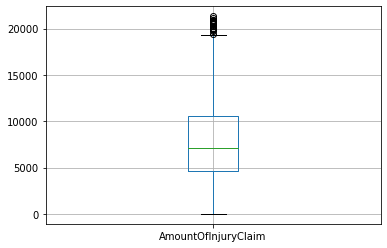

In [84]:
data1.boxplot(column = 'AmountOfInjuryClaim')

In [85]:
checkoutliers(data1, 'AmountOfInjuryClaim')

(0, 0.0, 24, 0.0008840104607904527)

In [86]:
imputeoutliers(data1, 'AmountOfInjuryClaim')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

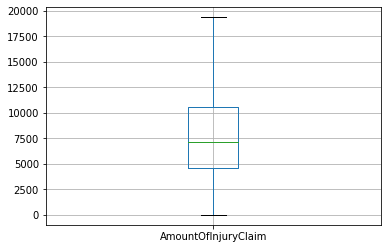

In [87]:
data1.boxplot(column = 'AmountOfInjuryClaim')

<AxesSubplot:>

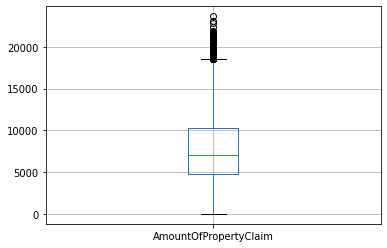

In [88]:
data1.boxplot(column = 'AmountOfPropertyClaim')

In [89]:
checkoutliers(data1, 'AmountOfPropertyClaim')

(0, 0.0, 150, 0.005525065379940329)

In [90]:
imputeoutliers(data1, 'AmountOfPropertyClaim')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

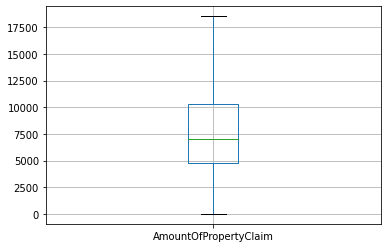

In [91]:
data1.boxplot(column = 'AmountOfPropertyClaim')

<AxesSubplot:>

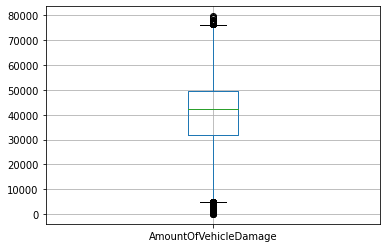

In [92]:
data1.boxplot(column = 'AmountOfVehicleDamage')

In [93]:
checkoutliers(data1, 'AmountOfVehicleDamage')

(4253, 0.15665402040590815, 38, 0.0013996832295848833)

In [94]:
imputeoutliers(data1, 'AmountOfVehicleDamage')
    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

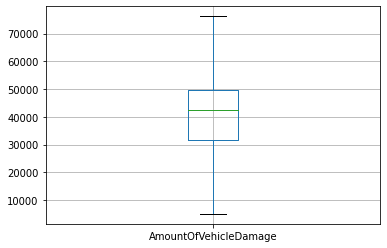

In [95]:
data1.boxplot(column = 'AmountOfVehicleDamage')

In [96]:
data1.columns

Index(['AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsuredAge', 'CapitalGains', 'CapitalLoss', 'CustomerLoyaltyPeriod',
       'Policy_Deductible', 'PolicyAnnualPremium', 'UmbrellaLimit'],
      dtype='object')

<AxesSubplot:>

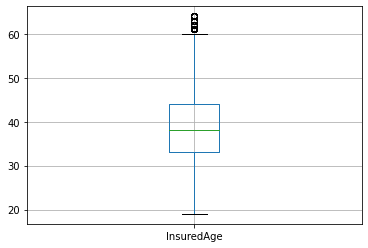

In [97]:
data1.boxplot(column = 'InsuredAge')

In [98]:
checkoutliers(data1, 'InsuredAge')

(0, 0.0, 155, 0.005709234225938341)

In [99]:
w2 = wishkers(data1['InsuredAge'])[1]
w2

60.5

In [100]:
data1.loc[data1['InsuredAge'] > 60, 'InsuredAge'] = 60

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

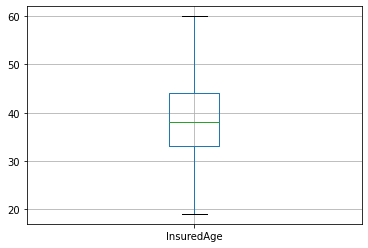

In [101]:
data1.boxplot(column = 'InsuredAge')

<AxesSubplot:>

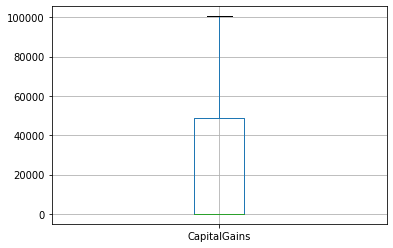

In [102]:
data1.boxplot(column = 'CapitalGains')

In [103]:
checkoutliers(data1, 'CapitalGains')

(0, 0.0, 0, 0.0)

<AxesSubplot:>

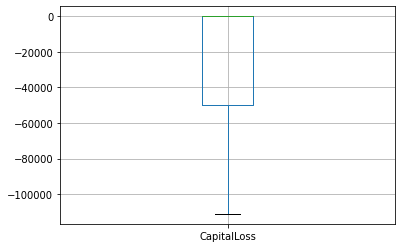

In [104]:
data1.boxplot(column = 'CapitalLoss')

In [105]:
checkoutliers(data1, 'CapitalLoss')

(0, 0.0, 0, 0.0)

<AxesSubplot:>

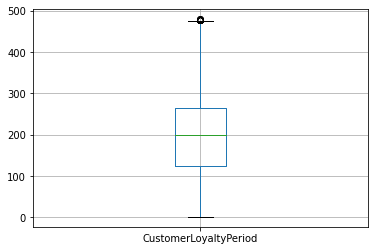

In [106]:
data1.boxplot(column = 'CustomerLoyaltyPeriod')

In [107]:
checkoutliers(data1, 'CustomerLoyaltyPeriod')

(0, 0.0, 19, 0.0006998416147924417)

In [108]:
imputeoutliers(data1, 'CustomerLoyaltyPeriod')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

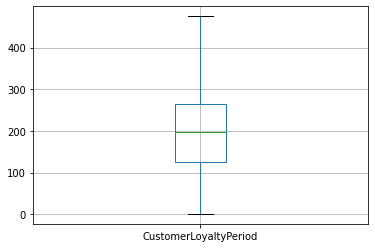

In [109]:
data1.boxplot(column = 'CustomerLoyaltyPeriod')

<AxesSubplot:>

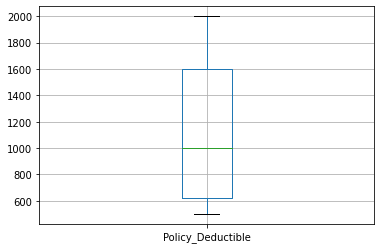

In [110]:
data1.boxplot(column = 'Policy_Deductible')

In [111]:
checkoutliers(data1, 'Policy_Deductible')

(0, 0.0, 0, 0.0)

<AxesSubplot:>

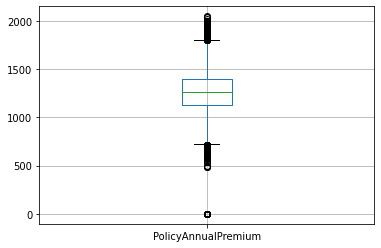

In [112]:
data1.boxplot(column ='PolicyAnnualPremium')

In [113]:
checkoutliers(data1, 'PolicyAnnualPremium')

(227, 0.0083612656083097, 184, 0.006777413532726804)

In [114]:
imputeoutliers(data1, 'PolicyAnnualPremium')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

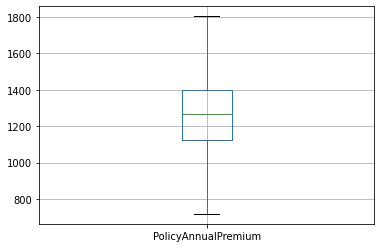

In [115]:
data1.boxplot(column ='PolicyAnnualPremium')

<AxesSubplot:>

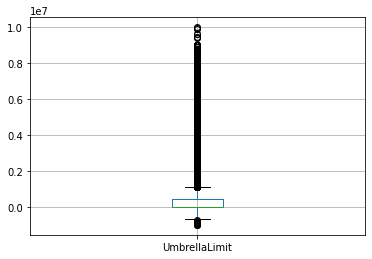

In [116]:
data1.boxplot(column = 'UmbrellaLimit')

In [117]:
checkoutliers(data1, 'UmbrellaLimit')

(12, 0.00044200523039522637, 6139, 0.22612250911635787)

In [118]:
sum(data1['UmbrellaLimit'] == 0)/len(data1)

0.7317028251500977

In [119]:
data1['UmbrellaLimit'].value_counts()

0          19865
6000000      301
5000000      131
7000000      106
4000000       69
           ...  
3579351        1
3314794        1
1315519        1
4185875        1
4674160        1
Name: UmbrellaLimit, Length: 6644, dtype: int64

In [120]:
data.drop(columns = 'UmbrellaLimit', inplace = True)

In [121]:
data

,CustomerID,ReportedFraud,DateOfIncident,TypeOfIncident,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,...,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,InsuredRelationship,VehicleID,VehicleMake,VehicleModel,VehicleYOM
0,Cust20065,N,2015-01-09,Multi-vehicle Collision,Total Loss,Other,State9,City4,Location 1404,19,...,1998-11-14,State2,250/500,2000,1142.87,own-child,Vehicle30662,Mercedes,E400,2005
1,Cust37589,N,2015-02-20,Single Vehicle Collision,Minor Damage,Ambulance,State4,City3,Location 1675,14,...,2000-08-19,State2,100/300,1000,1274.38,own-child,Vehicle17183,Toyota,Highlander,2010
2,Cust24312,N,2015-01-14,Multi-vehicle Collision,Major Damage,Ambulance,State5,City2,Location 1546,21,...,2000-06-23,State1,500/1000,745,1269.93,other-relative,Vehicle33982,Volkswagen,Passat,2002
3,Cust5493,Y,2015-01-07,Multi-vehicle Collision,Major Damage,Ambulance,State7,City4,Location 1413,12,...,1992-01-15,State2,100/300,986,1218.60,other-relative,Vehicle12299,Toyota,Highlander,2011
4,Cust7704,Y,2015-02-26,Multi-vehicle Collision,Major Damage,Other,State4,City6,Location 1367,3,...,2001-09-23,State3,250/500,576,1431.02,unmarried,Vehicle30447,Ford,Wrangler,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28831,Cust9773,N,2015-02-13,Single Vehicle Collision,Minor Damage,Fire,State7,City3,Location 1324,16,...,2007-02-07,State2,250/500,1000,1108.55,unmarried,Vehicle24503,Nissan,RSX,2002
28832,Cust38439,N,2015-01-19,Multi-vehicle Collision,Total Loss,Police,State5,City3,Location 1880,19,...,2006-10-18,State2,100/300,1008,1551.84,own-child,Vehicle9733,Accura,RSX,2014
28833,Cust38444,N,2015-01-21,Multi-vehicle Collision,Total Loss,Police,State5,City7,Location 1632,16,...,2011-11-23,State1,100/300,660,1119.32,not-in-family,Vehicle1823,Saab,RSX,2013
28834,Cust26466,N,2015-01-02,Parked Car,Trivial Damage,None,State4,City7,Location 1364,12,...,1997-08-04,State3,250/1000,1674,1229.88,wife,Vehicle9113,Accura,RSX,2004


In [122]:
data1

,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsuredAge,CapitalGains,CapitalLoss,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
0,9396.0,4698.0,29879.0,58,0,-42700,432,2000,1142.87,0
1,6539.0,6539.0,49232.0,34,51300,0,128,1000,1274.38,2857344
2,6069.0,6069.0,30686.0,52,0,0,346,745,1269.93,0
3,253.0,5741.0,39678.0,25,47400,-56100,42,986,1218.60,0
4,7407.0,14813.0,59252.0,27,0,0,109,576,1431.02,4235779
...,...,...,...,...,...,...,...,...,...,...
28831,5543.0,5543.0,39429.0,39,0,0,251,1000,1108.55,739864
28832,8678.0,8738.0,76245.5,21,20000,-75000,14,1008,1551.84,41592
28833,13224.0,7990.0,66679.0,35,0,-75000,153,660,1119.32,0
28834,728.0,1457.0,5099.0,40,0,-63900,241,1674,1229.88,4674160
